<a href="https://colab.research.google.com/github/GabeMaldonado/Kali_Linux/blob/master/Kali_Linux.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notes on Kalix Linux and Ethical Hacking

## User and Privileges

To create a file:
```~# echo "hello" > hello.txt```

To read the file on the console
```~# cat hello.txt```

To list files and permissions 
```~# ls -la ```

As default, file have rw access but we can change that using:

```~# chmod +rwx hello.txt``` to give it read, write, execute access, we can also pass a single parameter for a single access

```~# chmod 777 hello.txt``` gives the file full access

To add a new user:




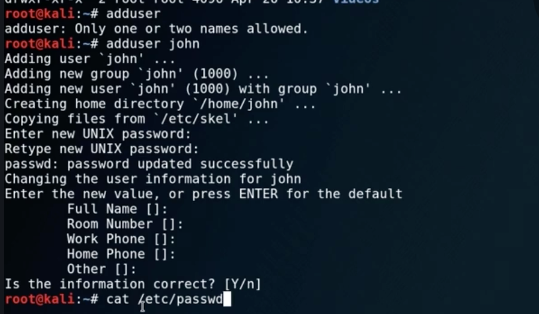

In [2]:
from IPython.display import Image
Image(filename="/content/Screen Shot 2020-07-03 at 11.25.54 AM.png")

If we `cat` the `/etc/passwd/` file we will see the new user 'john' at the bottom of the file. The password for this use is stored in the `/etc/shadow` file and it is hashed. 

To switch users:
```~# su john  ```

## Common Network Commands

`Ifconfig` , similar to Windows `ipconfig`

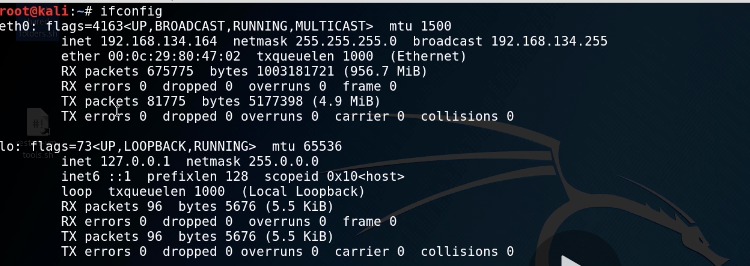

In [3]:
Image("/content/Screen Shot 2020-07-03 at 11.45.28 AM.png")

To check wireless adapters:

`~# iwconfig`

To try to 'talk to' devices in the network, ICMP traffic:

`~# ping`

To see the IP address and the MAC address:

`~# arp -a`

To show active connections on the machine:

`~# netstat -ano`

To print the routing table on the console:

`~# route`

## Working with Files

Above we saw that we can create files using `echo "some text > file.txt"`. We also saw that we can see the contents of the file on the console with `cat`.

To add/append to the file we have to use an extra **>** before the file name:

`~#echo "add more text" >> file.txt`

To create an empty file:

`~# touch newfile.txt`

We can use the text editor **nano** to edit the new file:

`~#nano newfile.txt`

If the machine we are working in has a GUI we can use **gedit** to edit the file:

`~# gedit newfile.txt`

## Starting and Stopping Services in Kali

Here we refer to webservers, ssh, sql database as services.

To start the apache web server:

`~# service apache2 start`

To start a python web server

`~# python -m SimpleHTTPServer`

To stop a service:

`~# service apache2 stop`

On reboot the service we manyally started will not run again. To make the service start automatically when the machine starts we need to use:

`~# systemctl enable postgresql`




## Installing and Updating Tools

To update and upgrade the system:

`~# apt update && apt upgrade`

To install a particular package, for instance python pip:

`~# apt install python pip`

To download files form a git repo

`~# git clone https://github.com/repo_name`







## Bash Scripting



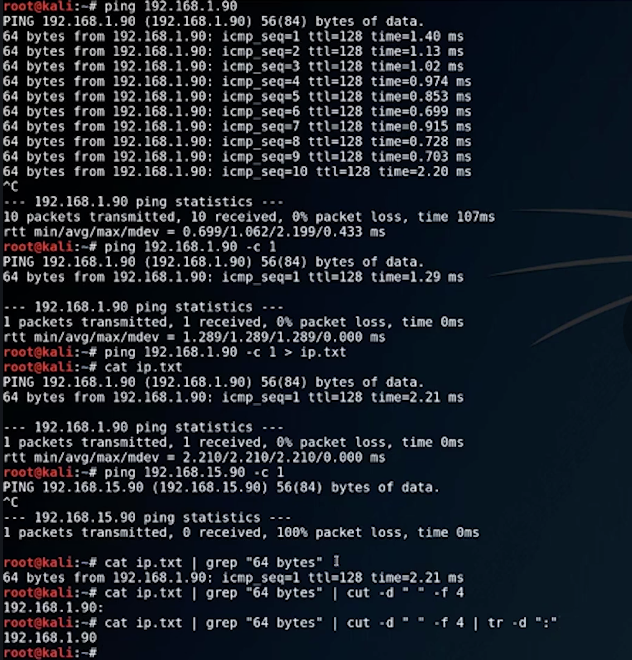

In [4]:
Image("/content/Screen Shot 2020-07-03 at 3.21.42 PM.png")

In the image above, we create a file that contains a ping command to a IP adress. If the ping is sucessful we want to grab the IP address only. We can use this when doing a network sweep and we are interested in retrieve the IP adresses. 
Let analyze the commands:
*   `cat ip.txt` would print what the ping command returns, which is normally info abouut the ping.
*   We want to grab the first line ig the ping is successful. We do this by using **grep** and passing the text parameter we are looking for:

      *   `~# cat ip.txt | grep "64 bytes"`
*   We got the whole line using `grep` but we are only interested in the IP address so we neet to **cut** the rest of the text to retrieve it. The `cut` commands needs the delimeter parameter, in this case--a space and the field we want to retrieve--which is four  `-d " " f 4` so we use the pipe `|` to add another command to our script

      *   `~# cat ip.txt | grep "64 bytes" | cut -d " " -f 4`
*   As we can see above, we now have the IP address but it has an extra `:` at the end that we need to remove so we now use the translate command `tr` with its delimiter:
      *   `~# cat ip.txt |grep "64 bytes" | cut -d " " f 4 | tr -d ":"`

With this knowledge we can now create a scrip that will sweep the network and find IP addresses. This scipt will throw an error if an IP base is nor privided.

```
#!/bin/bash

if [ "$1" == "" ]
then
echo "IP address not provided"

else
for ip in `seq ` 264` : do
ping -c 1 $1.$ip | grep "64 bytes" | cut -d " " -f 4 | tr -d ":" &
done
fi
```